# 1.Import các thư viện cần thiết

In [302]:
# %pip install pandas
# %pip install scikit-learn
# %pip install torch

In [303]:


# Import các thư viện cần thiết

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import joblib


# 2.Import datasheet và tiền xử lý dữ liệu

In [304]:
# Đọc dữ liệu
url = "penguins_size.csv"
data = pd.read_csv(url, delimiter=',')

In [305]:
# Show data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [306]:
# Xóa các hàng có giá trị thiếu
data.dropna(inplace=True)
# Mã hóa các biến phân loại
#
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['island'] = label_encoder.fit_transform(data['island'])


# Chia dữ liệu thành features và label
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'island']]
y = data['species']

In [307]:
#Data
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island
0,39.1,18.7,181.0,3750.0,2,2
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
4,36.7,19.3,193.0,3450.0,1,2
5,39.3,20.6,190.0,3650.0,2,2
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,2,0
342,45.2,14.8,212.0,5200.0,1,0


In [308]:
#label
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int32

In [309]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [310]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # type: ignore

# Chọn tính năng


# Chọn tính năng
selector = SelectKBest(k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)





c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(


In [311]:
X_train

array([[ 0.752437  , -0.76559187,  1.42029818,  1.10049995,  0.99600227,
        -0.90893258],
       [ 0.6022236 , -1.2799601 ,  0.77409178,  0.63981636, -0.97068018,
        -0.90893258],
       [-1.23789063, -0.04547633, -1.16452741, -0.74223442, -0.97068018,
        -0.90893258],
       ...,
       [-0.84358044,  0.31458143, -0.59012172, -1.23363026, -0.97068018,
        -0.90893258],
       [ 0.24546676, -1.07421281,  1.34849747,  0.97765099,  0.99600227,
        -0.90893258],
       [-1.14400725, -0.04547633, -1.45173025, -1.2643425 , -0.97068018,
        -0.90893258]])

In [312]:
y_train

292    2
302    2
62     0
181    1
15     0
      ..
194    1
77     0
112    0
277    2
108    0
Name: species, Length: 233, dtype: int32

In [313]:
X_test

array([[-0.88113379, -0.1997868 , -1.66713239, -1.17220578, -0.97068018,
         0.53175648],
       [ 0.50834022, -1.2799601 ,  1.49209889,  0.82408979, -0.97068018,
        -0.90893258],
       [-0.39294022,  1.03469696, -0.4465203 , -0.25083859,  0.99600227,
         1.97244553],
       [ 1.05286381,  0.10883414, -0.23111817, -0.65009771, -0.97068018,
         0.53175648],
       [-0.58070698,  0.57176555, -0.66192243, -0.18941411,  0.99600227,
        -0.90893258],
       [ 0.1328067 , -1.69145469,  0.77409178,  0.6705286 , -0.97068018,
        -0.90893258],
       [ 1.2218539 , -1.07421281,  1.5638996 ,  1.65332026,  0.99600227,
        -0.90893258],
       [ 1.03408714,  0.77751285, -0.4465203 , -0.74223442,  0.99600227,
         0.53175648],
       [ 1.01531046,  0.57176555, -0.59012172, -0.52724875,  0.99600227,
         0.53175648],
       [ 1.35329063,  0.98326014, -0.01571604, -0.31226307,  0.99600227,
         0.53175648],
       [-0.24272681,  0.26314461, -0.37471959,  0.

In [314]:
y_test

30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int32

# 3.Huấn luyện mô hình dựa trên Preceptron Learning Algorithm

In [315]:

# Tạo mô hình PLA
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Huấn luyện mô hình PLA
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [316]:
# Lưu mô hình
joblib.dump(perceptron, 'perceptron.pkl')

['perceptron.pkl']

In [317]:
# Dự đoán trên tập kiểm tra
y_pred_pla = joblib.load('perceptron.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình PLA trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_pla):", y_pred_pla)
print("Độ chính xác:", accuracy_score(y_test, y_pred_pla))

#print("Ma trận nhầm lẫn:", confusion_matrix(y_test, y_pred_pla))

Kết quả dự đoán của mô hình PLA trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int32
Kết quả dự đoán (y_pred_pla): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 1 0 1 1 2 2 2 0 0 2 0 2 0 2 0 0 2 2
 2 1 0 0 0 2 0 0 1 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9900990099009901


In [318]:
# Đánh giá mô hình PLA
print("PLA Classification Report:")
print(classification_report(y_test, y_pred_pla))

PLA Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.98      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [319]:
print("Ma trận nhầm lẫn PLA:", confusion_matrix(y_test, y_pred_pla))

Ma trận nhầm lẫn PLA: [[48  1  0]
 [ 0 18  0]
 [ 0  0 34]]


In [320]:
# Chuyển đổi X_test thành DataFrame pandas
X_test_df = pd.DataFrame(X_test, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'island'])

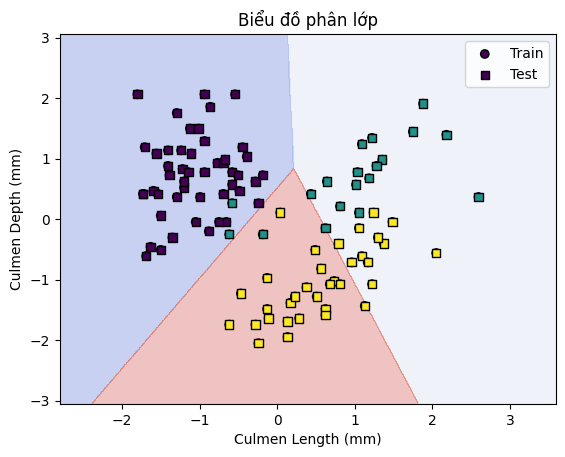

In [321]:
# Vẽ biểu đồ phân lớp
#



# Tạo lưới để vẽ đường biên quyết định
x_min, x_max = X_test_df['culmen_length_mm'].min() - 1, X_test_df['culmen_length_mm'].max() + 1
y_min, y_max = X_test_df['culmen_depth_mm'].min() - 1, X_test_df['culmen_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size)])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
plt.scatter(X_test_df['culmen_length_mm'], X_test_df['culmen_depth_mm'], c=y_test, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test_df['culmen_length_mm'], X_test_df['culmen_depth_mm'], c=y_pred_pla, marker='s', edgecolor='k', label='Test')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp')
plt.legend()
plt.show()

# 4.Huấn luyện mô hình dựa trên ID3



In [322]:
    
# Tạo mô hình ID3
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện mô hình ID3
id3.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [323]:
# Lưu mô hình
joblib.dump(id3, 'id3.pkl')




['id3.pkl']

In [324]:
# Dự đoán trên tập kiểm tra
y_pred_id3 = joblib.load('id3.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_id3):", y_pred_id3)
print("Độ chính xác:", accuracy_score(y_test, y_pred_id3))



Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int32
Kết quả dự đoán (y_pred_id3): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 2 2 2 0 0 2 0 2 0 2 0 0 2 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 1 0 0]
Độ chính xác: 0.9801980198019802


In [325]:
# Đánh giá mô hình ID3
print("ID3 Classification Report:")
print(classification_report(y_test, y_pred_id3))

ID3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.94      0.94      0.94        18
           2       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.98      0.98      0.98       101



In [326]:
print("Ma trận nhầm lẫn id3:", confusion_matrix(y_test, y_pred_id3))

Ma trận nhầm lẫn id3: [[48  1  0]
 [ 1 17  0]
 [ 0  0 34]]


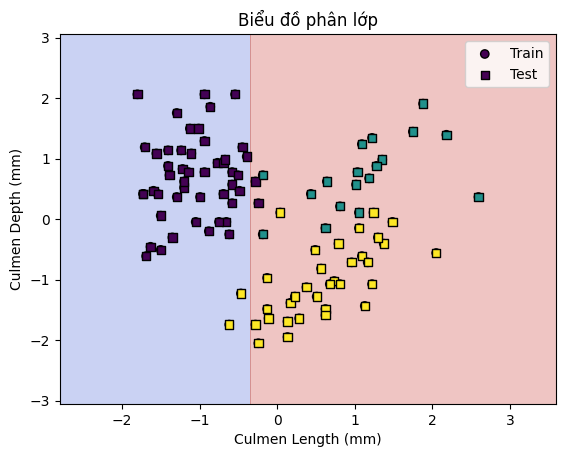

In [327]:
# Tạo lưới để vẽ đường biên quyết định
x_min, x_max = X_test_df['culmen_length_mm'].min() - 1, X_test_df['culmen_length_mm'].max() + 1
y_min, y_max = X_test_df['culmen_depth_mm'].min() - 1, X_test_df['culmen_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = id3.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size)])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
plt.scatter(X_test_df['culmen_length_mm'], X_test_df['culmen_depth_mm'], c=y_test, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test_df['culmen_length_mm'], X_test_df['culmen_depth_mm'], c=y_pred_id3, marker='s', edgecolor='k', label='Test')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp')
plt.legend()
plt.show()

# 5.Huấn luyện mô hình dựa trên Neural Network (MLPClassifier)


In [328]:
# Tạo mô hình MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, )#activation='tanh'

# Huấn luyện mô hình MLP
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [329]:
# Lưu mô hình
joblib.dump(mlp, 'mlp.pkl')



['mlp.pkl']

In [330]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = joblib.load('mlp.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình MLP trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_mlp):", y_pred_mlp)
print("Độ chính xác:", accuracy_score(y_test, y_pred_mlp))

#

Kết quả dự đoán của mô hình MLP trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int32
Kết quả dự đoán (y_pred_mlp): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 2 2 2 0 0 2 0 2 0 2 0 0 2 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9900990099009901


In [331]:
# Đánh giá mô hình MLP
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



In [332]:
print("Ma trận nhầm lẫn mlp:", confusion_matrix(y_test, y_pred_mlp))

Ma trận nhầm lẫn mlp: [[49  0  0]
 [ 1 17  0]
 [ 0  0 34]]


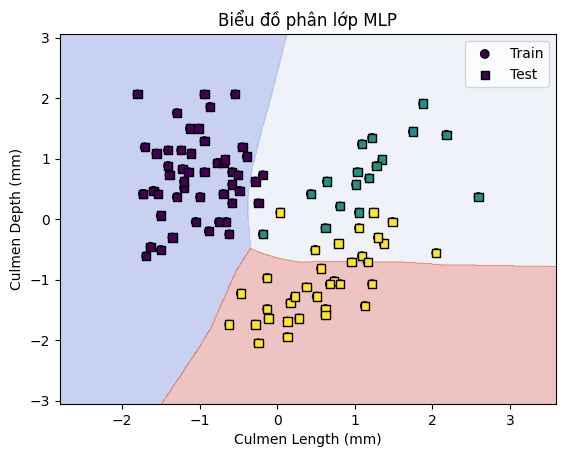

In [333]:
# Vẽ biểu đồ phân lớp (Chỉ có thể vẽ cho 2 đặc trưng)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size), np.zeros(xx.size)])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_mlp, marker='s', edgecolor='k', label='Test')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp MLP')
plt.legend()
plt.show()

Biểu Đồ


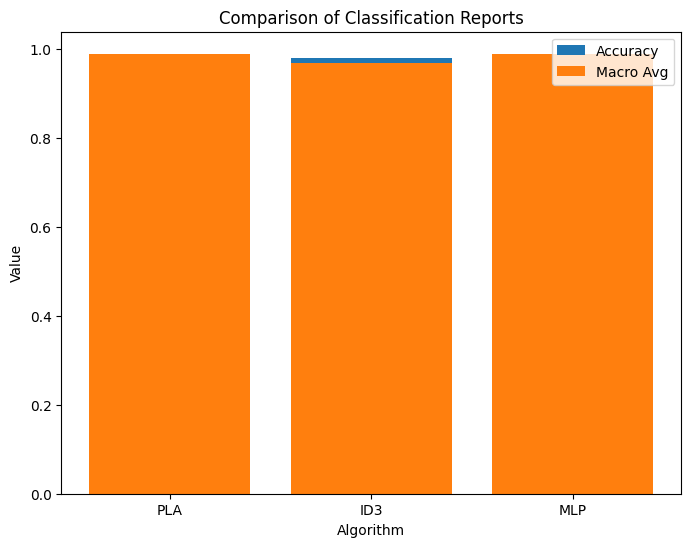

In [334]:
# Data for the plot
algorithms = ['PLA', 'ID3', 'MLP']
accuracies = [0.99, 0.98, 0.99]
macro_avgs = [0.99, 0.97, 0.99]

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, label='Accuracy')
plt.bar(algorithms, macro_avgs, label='Macro Avg')
plt.xlabel('Algorithm')
plt.ylabel('Value')
plt.title('Comparison of Classification Reports')
plt.legend()
plt.show()

Ma tran nham lan

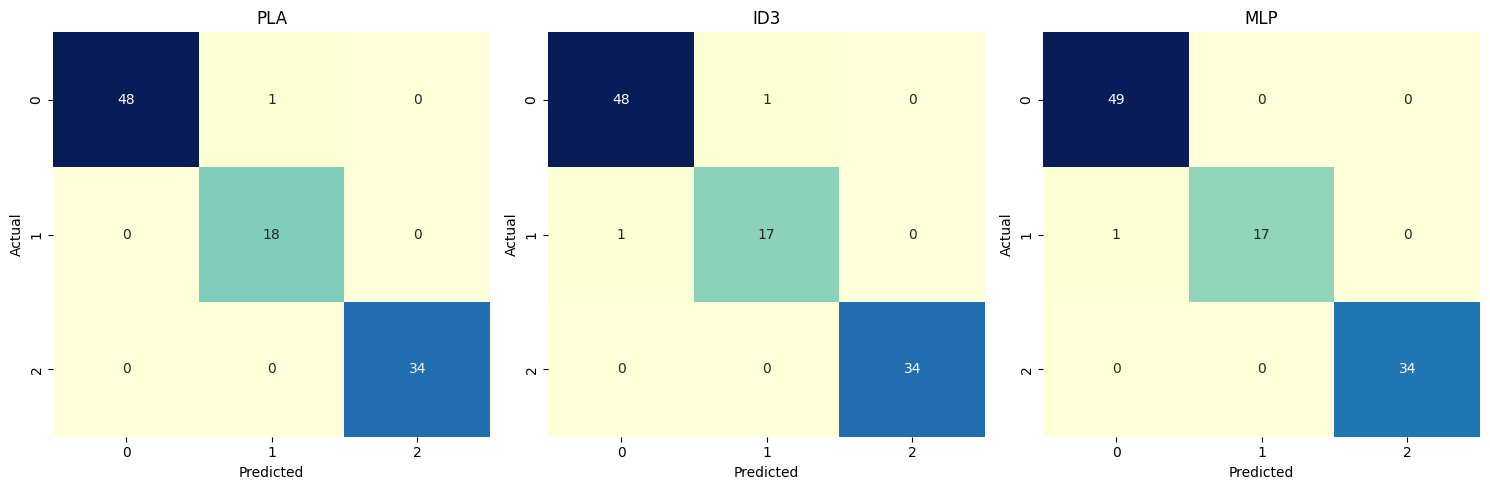

In [335]:
import seaborn as sns
# Ma trận nhầm lẫn
cm_pla = np.array([[48, 1, 0], [0, 18, 0], [0, 0, 34]])
cm_id3 = np.array([[48, 1, 0], [1, 17, 0], [0, 0, 34]])
cm_mlp = np.array([[49, 0, 0], [1, 17, 0], [0, 0, 34]])

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_pla, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("PLA")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_id3, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("ID3")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("MLP")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()